In [1]:
import cv2
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from kmeans import StandardKMeans1, StandardKMeans2, mp1KMeans, mp2KMeans,  allowKMeans1,  allowKMeans2, chop
LOW_PREC = chop(np.float16)

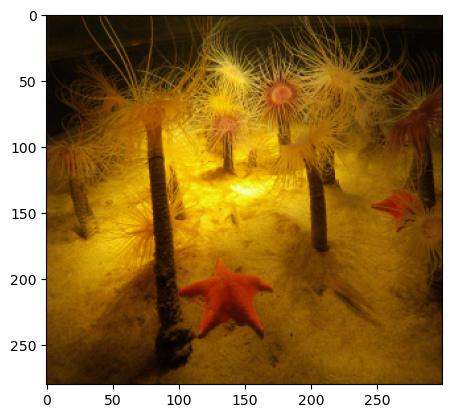

In [2]:
files = ['ILSVRC2012_val_00000017.jpg', 
         'ILSVRC2012_val_00006582.jpg']

image=cv2.imread('data/Img/'+files[0])
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.resize(image, (300,280), interpolation = cv2.INTER_AREA)
plt.axis('on')
plt.imshow(img)
plt.show()

In [3]:
tols = [0.1, 0.3, 0.5, 0.7]
figure_size = 10

def read_image(image, sizes=(200,180)):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, sizes, interpolation = cv2.INTER_AREA)
    vectorized = np.float64(img.reshape((-1,3)))

    vectorized = vectorized / 255.0
    return vectorized, img.shape

def reconstruct_img(kmeans, shape):
    kmeans_centers = np.uint8(kmeans.centers * 255.0)
    kmeans_res = kmeans_centers[kmeans.labels]
    kmeans_image = kmeans_res.reshape((shape))
    return kmeans_image


In [4]:

image = cv2.imread('data/Img/'+files[0])

vectorized, shape = read_image(image, sizes=(300,280))
# from seeding import *

# centers = all_low_pca_aggregate2(vectorized, 0.1, LOW_PREC)

for i in range(len(tols)):
    kmeans_psa = StandardKMeans2(alpha=tols[i], seeding='psa')
    kmeans_psa.fit(vectorized)

    mpkmeans_psa = mp2KMeans(alpha=tols[i], seeding='psa', low_prec=LOW_PREC)
    mpkmeans_psa.fit(vectorized)

    kmeans_d2 = StandardKMeans2(n_clusters=kmeans_psa.centers.shape[0], seeding='d2')
    kmeans_d2.fit(vectorized)

    mpkmeans_d2 = mp2KMeans(n_clusters=mpkmeans_psa.centers.shape[0], seeding='d2', low_prec=LOW_PREC)
    mpkmeans_d2.fit(vectorized)

    ###  PSA seeding
    plt.figure(figsize=(figure_size, figure_size-1))
    kmeans_psa_image = reconstruct_img(kmeans_psa, shape)
    edges = cv2.Canny(kmeans_psa_image, 150,150)
    kmeans_psa_image[edges == 255] = [255, 0, 0]

    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(kmeans_psa.labels)), 
                                                                           kmeans_psa.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(kmeans_psa_image)
    plt.savefig('results/segmentation/Csegpsa'+str(tols[i])+'1.pdf', bbox_inches='tight')
    plt.show()

    ###  mixed precision PSA seeding
    plt.figure(figsize=(figure_size, figure_size))
    mpkmeans_psa_image = reconstruct_img(mpkmeans_psa, shape)
    edges = cv2.Canny(mpkmeans_psa_image, 150,150)
    mpkmeans_psa_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(mpkmeans_psa.labels)), 
                                                                           mpkmeans_psa.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(mpkmeans_psa_image)
    plt.savefig('results/segmentation/Csegmppsa'+str(tols[i])+'1.pdf', bbox_inches='tight')
    plt.show()

    ### kmeans_d2
    plt.figure(figsize=(figure_size, figure_size))
    kmeans_d2_image = reconstruct_img(kmeans_d2, shape)
    edges = cv2.Canny(kmeans_d2_image, 150,150)
    kmeans_d2_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(kmeans_d2.labels)), 
                                                                           kmeans_d2.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(kmeans_d2_image)
    plt.savefig('results/segmentation/Csegd2'+str(tols[i])+'1.pdf', bbox_inches='tight')
    plt.show()

    ### mixed precision kmeans_d2
    plt.figure(figsize=(figure_size, figure_size))
    mpkmeans_d2_image = reconstruct_img(mpkmeans_d2, shape)
    edges = cv2.Canny(mpkmeans_d2_image, 150,150)
    mpkmeans_d2_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(mpkmeans_d2.labels)), 
                                                                           mpkmeans_d2.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(mpkmeans_d2_image)
    plt.savefig('results/segmentation/Csegmpd2'+str(tols[i])+'1.pdf', bbox_inches='tight')
    plt.show()

KeyboardInterrupt: 

In [ ]:

image = cv2.imread('data/Img/'+files[1])

vectorized, shape = read_image(image, sizes=(300,280))
# from seeding import *

# centers = all_low_pca_aggregate2(vectorized, 0.1, LOW_PREC)

for i in range(len(tols)):
    kmeans_psa = StandardKMeans2(alpha=tols[i], seeding='psa')
    kmeans_psa.fit(vectorized)

    mpkmeans_psa = mp2KMeans(alpha=tols[i], seeding='psa', low_prec=LOW_PREC)
    mpkmeans_psa.fit(vectorized)

    kmeans_d2 = StandardKMeans2(n_clusters=kmeans_psa.centers.shape[0], seeding='d2')
    kmeans_d2.fit(vectorized)

    mpkmeans_d2 = mp2KMeans(n_clusters=mpkmeans_psa.centers.shape[0], seeding='d2', low_prec=LOW_PREC)
    mpkmeans_d2.fit(vectorized)

    ###  PSA seeding
    plt.figure(figsize=(figure_size, figure_size-1))
    kmeans_psa_image = reconstruct_img(kmeans_psa, shape)
    edges = cv2.Canny(kmeans_psa_image, 150,150)
    kmeans_psa_image[edges == 255] = [255, 0, 0]

    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(kmeans_psa.labels)), 
                                                                           kmeans_psa.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(kmeans_psa_image)
    plt.savefig('results/segmentation/Csegpsa'+str(tols[i])+'2.pdf', bbox_inches='tight')
    plt.show()

    ###  mixed precision PSA seeding
    plt.figure(figsize=(figure_size, figure_size))
    mpkmeans_psa_image = reconstruct_img(mpkmeans_psa, shape)
    edges = cv2.Canny(mpkmeans_psa_image, 150,150)
    mpkmeans_psa_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(mpkmeans_psa.labels)), 
                                                                           mpkmeans_psa.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(mpkmeans_psa_image)
    plt.savefig('results/segmentation/Csegmppsa'+str(tols[i])+'2.pdf', bbox_inches='tight')
    plt.show()

    ### kmeans_d2
    plt.figure(figsize=(figure_size, figure_size))
    kmeans_d2_image = reconstruct_img(kmeans_d2, shape)
    edges = cv2.Canny(kmeans_d2_image, 150,150)
    kmeans_d2_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(kmeans_d2.labels)), 
                                                                           kmeans_d2.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(kmeans_d2_image)
    plt.savefig('results/segmentation/Csegd2'+str(tols[i])+'2.pdf', bbox_inches='tight')
    plt.show()

    ### mixed precision kmeans_d2
    plt.figure(figsize=(figure_size, figure_size))
    mpkmeans_d2_image = reconstruct_img(mpkmeans_d2, shape)
    edges = cv2.Canny(mpkmeans_d2_image, 150,150)
    mpkmeans_d2_image[edges == 255] = [255, 0, 0]
    plt.title('Segmented image when clusters = {0:d}, SSE={1:3.4f}'.format(len(set(mpkmeans_d2.labels)), 
                                                                           mpkmeans_d2.inertia[-1]), fontsize=15)
    plt.xticks([]), plt.yticks([])
    plt.imshow(mpkmeans_d2_image)
    plt.savefig('results/segmentation/Csegmpd2'+str(tols[i])+'2.pdf', bbox_inches='tight')
    plt.show()